### Qcodes example notebook for Alazar card ATS9360 and acq controllers

In [1]:
import qcodes as qc
import qcodes.instrument.parameter as parameter
import qcodes.instrument_drivers.AlazarTech.ATS9360 as ATSdriver
import qcodes.instrument_drivers.AlazarTech.basic_controller as basic_aqc_contr
import qcodes.instrument_drivers.AlazarTech.samp_controller as samp_acq_contr
import qcodes.instrument_drivers.AlazarTech.samp as samp

import logging
logging.basicConfig(filename='example.log',level=logging.INFO)

qc.halt_bg()

No loop running


NB: See ATS9870 example notebook for general commands 

In [2]:
# Create the ATS9360 instrument
alazar = ATSdriver.AlazarTech_ATS9360(name='Alazar')
# Print all information about this Alazar card
alazar.get_idn()

{'CPLD_version': '25.16',
 'SDK_version': '5.9.25',
 'asopc_type': '1712554848',
 'bits_per_sample': 12,
 'driver_version': '5.9.25',
 'firmware': None,
 'latest_cal_date': '13-11-15',
 'max_samples': 4294967294,
 'memory_size': '4294967294',
 'model': 'ATS9360',
 'pcie_link_speed': '0.5GB/s',
 'pcie_link_width': '8',
 'serial': '970344',
 'vendor': 'AlazarTech'}

In [3]:
# Configure all settings in the Alazar card
alazar.config(clock_source='EXTERNAL_CLOCK_10MHz_REF',
              sample_rate=500000000,
              clock_edge='CLOCK_EDGE_RISING',
              decimation=1,
              coupling=['DC','DC'],
              channel_range=[.4,.4],
              impedance=[50,50],
              trigger_operation='TRIG_ENGINE_OP_J',
              trigger_engine1='TRIG_ENGINE_J',
              trigger_source1='EXTERNAL',
              trigger_slope1='TRIG_SLOPE_POSITIVE',
              trigger_level1=140,
              trigger_engine2='TRIG_ENGINE_K',
              trigger_source2='DISABLE',
              trigger_slope2='TRIG_SLOPE_POSITIVE',
              trigger_level2=128,
              external_trigger_coupling='DC',
              external_trigger_range='ETR_2V5',
              trigger_delay=0,
              timeout_ticks=0,
              aux_io_mode='AUX_IN_AUXILIARY', # AUX_IN_TRIGGER_ENABLE for seq mode on
              aux_io_param='NONE' # TRIG_SLOPE_POSITIVE for seq mode on
             )

### Basic Acquisition

Pulls the raw data the alazar acquires averaged over number of records buffers.

In [4]:
# Create the acquisition controller which will take care of the data handling and tell it which 
# alazar instrument to talk to.
basic_acq_controller = basic_aqc_contr.Basic_Acquisition_Controller(name='basic_acq_controller', 
                                                                    alazar_name='Alazar')

In [5]:
# Configure settings in the controller to be used in an acquisition
# nb this must be done before the first acquisition 
basic_acq_controller.update_acquisition_kwargs(samples_per_record=1024,
                                              records_per_buffer=1,
                                              buffers_per_acquisition=1,
                                              allocated_buffers=1
                                              )

In [6]:
# Pull data from the card by calling get of the controllers acquisition parameter
data1 = basic_acq_controller.acquisition()
print(data1)

(array([ 0.02661783,  0.02368742,  0.02466422, ..., -0.02319902,
       -0.02319902, -0.02515263]), array([ 0.0002442,  0.001221 ,  0.001221 , ...,  0.0021978,  0.0021978,
        0.001221 ]))


In [7]:
basic_acq_controller.acquisition.shapes

((1024,), (1024,))

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-01-17/15-12-11'
   <Type>   | <array_id>             | <array.name> | <array.shape>
   Measured | index0                 | index0       | (1024,)
   Measured | basic_acq_controller_A | A            | (1024,)
   Measured | basic_acq_controller_B | B            | (1024,)
acquired at 2017-01-17 15:12:11


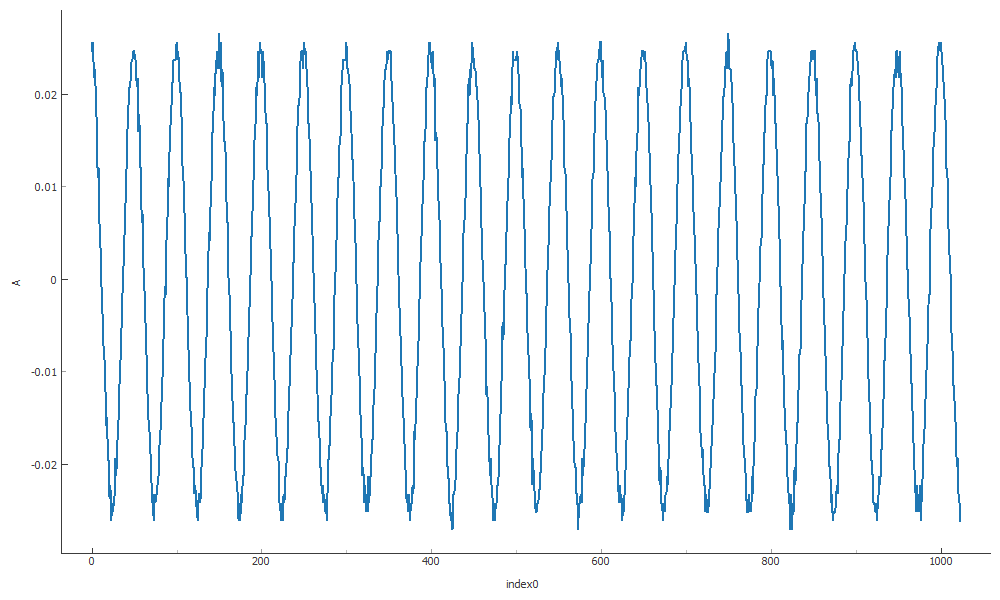

In [8]:
# Do this in as measurement (effactively the same but saves the data)
data2 = qc.Measure(basic_acq_controller.acquisition).run()
qc.QtPlot(data2.basic_acq_controller_A )

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-01-17/15-12-12_AlazarTest'
   <Type>   | <array_id>             | <array.name> | <array.shape>
   Setpoint | dummy_set              | dummy        | (5,)
   Measured | index0                 | index0       | (5, 1024)
   Measured | basic_acq_controller_A | A            | (5, 1024)
   Measured | basic_acq_controller_B | B            | (5, 1024)
started at 2017-01-17 15:12:17


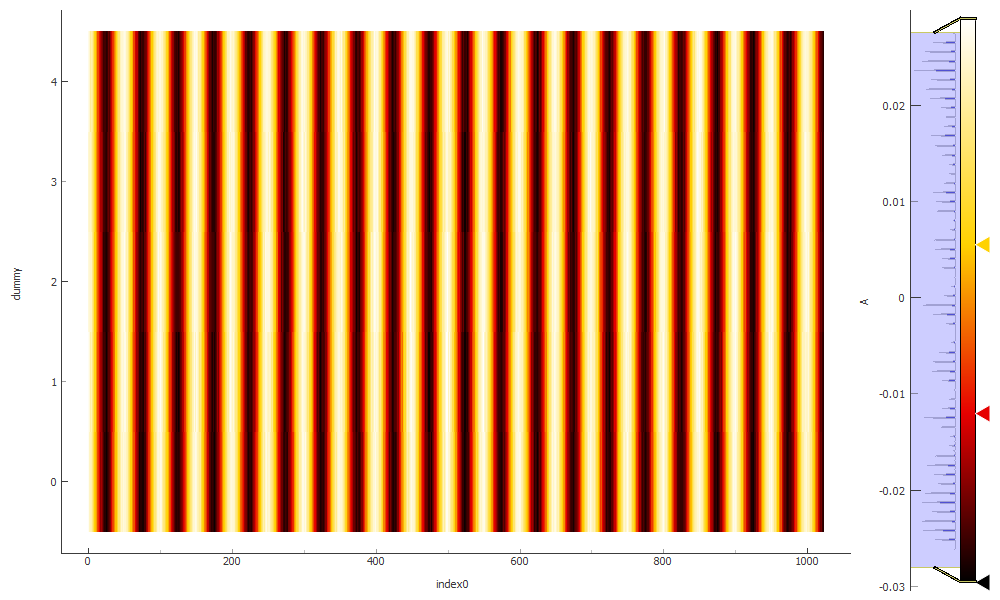

In [9]:
# Finally show that this instrument also works within a loop
dummy = parameter.ManualParameter(name="dummy")

data3 = qc.Loop(dummy[0:5:1]).each(basic_acq_controller.acquisition).run(name='AlazarTest')
qc.QtPlot(data3.basic_acq_controller_A)

### Samples Acquisition

This is the same as above except that it does some demodulation at the freqiencies specified

In [4]:
demod_list = [10e6, 11e6]

In [5]:
# Create the acquisition controller which will take care of the data handling and tell it which 
# alazar instrument to talk to.
samp_acq_controller = samp_acq_contr.HD_Samples_Controller(name='samp_acq_controller', 
                                                           alazar_name='Alazar',
                                                          demod_freqs=demod_list)

In [21]:
samp_acq_controller.acquisition.setpoints
#samp_acq_controller.int_time(1e-6)

(((0, 1),
  (1.9999999999999999e-07,
   2.0200216684723727e-07,
   2.0400433369447453e-07,
   2.0600650054171181e-07,
   2.0800866738894906e-07,
   2.1001083423618634e-07,
   2.1201300108342362e-07,
   2.1401516793066088e-07,
   2.1601733477789816e-07,
   2.1801950162513541e-07,
   2.200216684723727e-07,
   2.2202383531960995e-07,
   2.2402600216684723e-07,
   2.2602816901408451e-07,
   2.2803033586132177e-07,
   2.3003250270855905e-07,
   2.320346695557963e-07,
   2.3403683640303358e-07,
   2.3603900325027084e-07,
   2.3804117009750812e-07,
   2.400433369447454e-07,
   2.4204550379198265e-07,
   2.4404767063921991e-07,
   2.4604983748645722e-07,
   2.4805200433369447e-07,
   2.5005417118093173e-07,
   2.5205633802816903e-07,
   2.5405850487540629e-07,
   2.5606067172264354e-07,
   2.580628385698808e-07,
   2.600650054171181e-07,
   2.6206717226435536e-07,
   2.6406933911159261e-07,
   2.6607150595882992e-07,
   2.6807367280606718e-07,
   2.7007583965330443e-07,
   2.7207800650054168e-

In [7]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
samp_acq_controller.update_acquisition_kwargs(
                 samples_per_record=1024,
                 records_per_buffer=7,
                 buffers_per_acquisition=1,
                 allocated_buffers=1,
)

In [8]:
samp_acq_controller.int_time()

1.8480000000000001e-06

In [9]:
import numpy as np
mat = np.kron(np.ones(2), np.arange(10)).reshape(2, 10)
vec = np.kron(np.arange(2), np.ones(10)).reshape(2, 10)

In [16]:
np.angle(mat[:, 3:10:2])

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [38]:
np.multiply(vec, mat)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]])

In [12]:
mat.astype(float)

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]])

In [8]:
data3 = samp_acq_controller.acquisition()
qc.QtPlot(data3[1])

AttributeError: 'DeferredOperations' object has no attribute 'cos'

In [14]:
dummy = parameter.ManualParameter(name="dummy")
data4 = qc.Loop(dummy[0:5:1]).each(
    samp_cont.acquisition).run(name='AlazarTest')

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-11-08/10-10-07_AlazarTest'
   <Type>   | <array_id>                   | <array.name> | <array.shape>
   Setpoint | dummy_set                    | dummy        | (5,)
   Measured | sample_num                   | sample_num   | (5, 1024)
   Measured | samples_controller_magnitude | magnitude    | (5, 1024)
   Measured | samples_controller_phase     | phase        | (5, 1024)
started at 2016-11-08 10:10:09


In [23]:
qc.QtPlot(data4.samples_controller_magnitude)

NameError: name 'data4' is not defined

In [24]:
import qcodes.instrument_drivers.AlazarTech.ave_controller as single_controller

sing_contr = single_controller.HD_Controller(name='single_controller', 
                                             alazar_name='Alazar1', 
                                             demod_freq = 5e6,
                                             server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [25]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
sing_contr.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=2560,
                 records_per_buffer=1,
                 buffers_per_acquisition=1,
                 allocated_buffers=1,
)

In [30]:
dummy = parameter.ManualParameter(name="dummy")
data6 = qc.Loop(dummy[0:5:1]).each(
    sing_contr.acquisition).run(name='AlazarTest')

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-11-08/10-27-15_AlazarTest'
   <Type>   | <array_id>                  | <array.name> | <array.shape>
   Setpoint | dummy_set                   | dummy        | (5,)
   Measured | single_controller_magnitude | magnitude    | (5,)
   Measured | single_controller_phase     | phase        | (5,)
started at 2016-11-08 10:27:17


In [13]:
qc.QtPlot(data6.single_controller_phase)

In [ ]:
# Configure settings on Alazar card for sequencing mode (ie use aux i/o for triggering as well)
ats_inst.config(clock_source='EXTERNAL_CLOCK_10MHz_REF',
                sample_rate='10MHZ_REF_500MSPS',
                clock_edge='CLOCK_EDGE_RISING',
                decimation=1,
                coupling=['DC','DC'],
                channel_range=[.4,.4],
                impedance=[50,50],
                trigger_operation='TRIG_ENGINE_OP_J',
                trigger_engine1='TRIG_ENGINE_J',
                trigger_source1='EXTERNAL',
                trigger_slope1='TRIG_SLOPE_POSITIVE',
                trigger_level1=140,
                trigger_engine2='TRIG_ENGINE_K',
                trigger_source2='DISABLE',
                trigger_slope2='TRIG_SLOPE_POSITIVE',
                trigger_level2=128,
                external_trigger_coupling='DC',
                external_trigger_range='ETR_2V5',
                trigger_delay=0,
                timeout_ticks=0,
                aux_io_mode='AUX_IN_TRIGGER_ENABLE', 
                aux_io_param='TRIG_SLOPE_POSITIVE'
)

In [11]:
import qcodes.instrument_drivers.AlazarTech.rec_controller as record_controller

rec_contr = record_controller.HD_Records_Controller(name='rec_controller', 
                                                      alazar_name='Alazar1', 
                                                      demod_freq = 5e6,
                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [12]:
# This command is specific to this acquisition controller. The kwargs provided here are being forwarded to ats_inst.acquire
# This way, it becomes easy to change acquisition specific settings from the ipython notebook
rec_contr.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=1024,
                 records_per_buffer=20,
                 buffers_per_acquisition=1,
                 allocated_buffers=1,
)

<IPython.core.display.Javascript object>


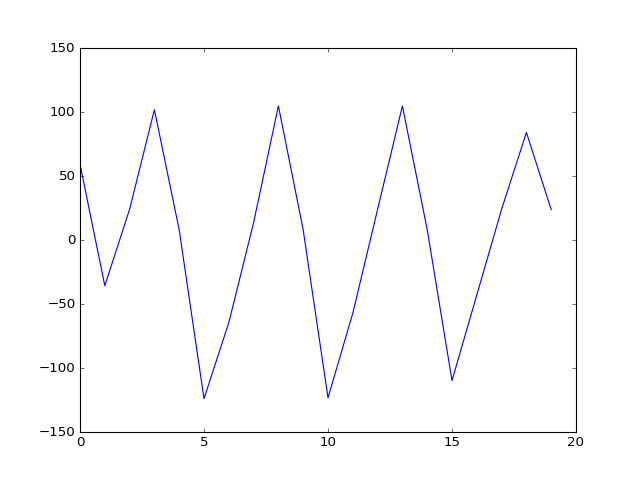

In [15]:
data7 = rec_contr.acquisition()
qc.MatPlot(data7[1])

In [16]:
dummy = parameter.ManualParameter(name="dummy")
data8 = qc.Loop(dummy[0:5:1]).each(
    rec_contr.acquisition).run(name='AlazarTest')

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-11-08/11-29-47_AlazarTest'
   <Type>   | <array_id>               | <array.name> | <array.shape>
   Setpoint | dummy_set                | dummy        | (5,)
   Measured | record_num               | record_num   | (5, 20)
   Measured | rec_controller_magnitude | magnitude    | (5, 20)
   Measured | rec_controller_phase     | phase        | (5, 20)
started at 2016-11-08 11:29:49


In [17]:
qc.QtPlot(data8.rec_controller_magnitude)